In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Colombia_COVID19_Coronavirus_casos_diarios.csv') # leemos el archivo
df_max_scaled = df.copy() # creamos una copia
df_max_scaled['norm_new_cases']  = df_max_scaled['NUEVOS_CASOS'] / df_max_scaled['NUEVOS_CASOS'].abs().max() #normalizamos con el máximo

In [3]:
# convertimos a formato datetime
df_max_scaled['FECHA_NEW'] = pd.to_datetime(df_max_scaled['FECHA_ACTUALIZACION'])

In [11]:
h = 1

def fun(x):
    if x/h <  1:
        return 3/4 * ( 1 - (x/h)**2)
    else:
        return 0

In [12]:
k =  []

for date in sorted(df_max_scaled['FECHA_NEW']):
    df_max_scaled['kernel'] = (df_max_scaled['FECHA_NEW'] - date).dt.days.apply(fun)
    df_max_scaled['kernel'] /= df_max_scaled['kernel'].sum()

    k.append((df_max_scaled['kernel']*df_max_scaled['norm_new_cases']).sum())
df_max_scaled['cases_kernel'] = k

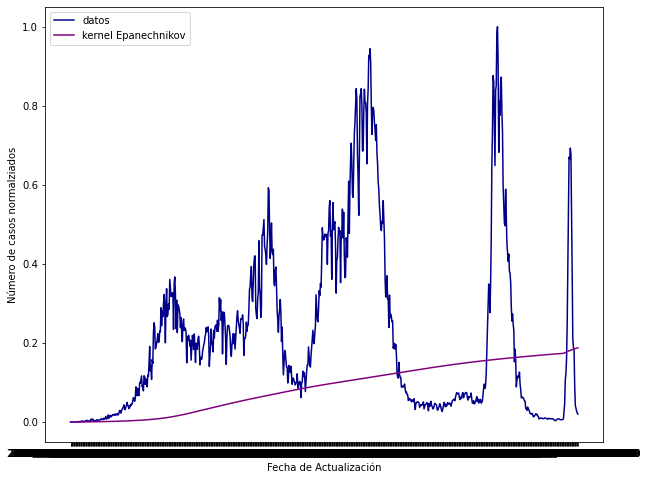

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(df_max_scaled['FECHA_ACTUALIZACION'], df_max_scaled['norm_new_cases'], color = 'darkblue', label = 'datos')
plt.plot(df_max_scaled['FECHA_ACTUALIZACION'], k, color = 'purple', label = 'kernel Epanechnikov')
plt.xlabel('Fecha de Actualización')
plt.ylabel('Número de casos normalziados')
plt.legend()
plt.show()